# Lahore Property Market Analysis

This analysis explores the rental property market in Lahore, Pakistan's second-largest city, using a comprehensive dataset of rental listings. By examining various property characteristics including prices, sizes, locations, and configurations, we aim to uncover patterns and insights that could benefit both market participants and researchers interested in urban housing dynamics.

The dataset encompasses multiple property types - from single rooms to large houses - and includes key metrics such as area (measured in Marlas), number of bedrooms and bathrooms, precise locations through geocoding, and rental prices. Through statistical analysis and visualization, we investigate how these factors interact to influence rental values across different market segments and geographical areas.

Our approach combines basic statistical methods with spatial analysis to provide a multi-dimensional view of Lahore's rental market. The findings could be particularly valuable for property investors, rental agencies, and urban planners looking to understand market segmentation and pricing dynamics in one of Pakistan's major real estate markets. Special attention is paid to geographical patterns and property configurations, as these often represent key decision factors in the local market.

# Data Preprocessing and Initial Setup

Starting with the essential libraries for our analysis. Pandas and numpy will handle our data processing needs, while matplotlib and seaborn will take care of visualizations. We'll also need requests for API interactions and re for text processing.

Setting the visualization style to "husl" for clear, distinguishable graphics. This palette provides good contrast and readability, which will be important when analyzing multiple variables. Warnings are suppressed to keep our output clean and focused.

The main dataset comes from a CSV file containing Lahore property rental information. This will serve as our foundation for analyzing the local real estate market trends.

In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import requests
import time
import re
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_palette("husl")

# Read the CSV file
df = pd.read_csv('csv/lahore-property-rents.csv')

# Initial Data Exploration

The initial data inspection reveals our dataset structure and content. Running info() shows our column types and basic dataset organization. A quick look at the first few rows confirms data formatting and gives us an initial sense of the information we're working with.

Descriptive statistics provide our first insights into the rental market - showing typical prices, property sizes, and room configurations. This initial overview helps identify potential areas of interest and any immediate concerns in the data.

The missing values analysis is crucial for ensuring data quality. By quantifying both the number and percentage of missing values in each column, we can plan appropriate strategies for handling incomplete data points.

In [26]:
# Display basic information about the dataset
print("Dataset Info:")
print("-" * 50)
df.info()

Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20510 entries, 0 to 20509
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      20510 non-null  object
 1   Price     20510 non-null  object
 2   Location  20510 non-null  object
 3   Baths     20510 non-null  object
 4   Area      20510 non-null  object
 5   Beds      20510 non-null  object
dtypes: object(6)
memory usage: 961.5+ KB


In [27]:
print("\nFirst few rows of the dataset:")
print("-" * 50)
display(df.head())


First few rows of the dataset:
--------------------------------------------------


,Type,Price,Location,Baths,Area,Beds
0,Upper Portion,PKR45 Thousand,"Wapda Town, Lahore, Punjab",3,10 Marla,2
1,Upper Portion,PKR40 Thousand,"Expo Avenue Society, Lahore, Punjab",3,10 Marla,3
2,Upper Portion,PKR47 Thousand,"Wapda Town, Lahore, Punjab",2,10 Marla,2
3,House,PKR5.95 Lakh,"Gulberg, Lahore, Punjab",7,2 Kanal,6
4,House,PKR5 Lakh,"Muslim Town, Lahore, Punjab",7,2 Kanal,5


In [28]:
print("\nDataset Description:")
print("-" * 50)
display(df.describe())


Dataset Description:
--------------------------------------------------


,Type,Price,Location,Baths,Area,Beds
count,20510,20510,20510,20510,20510,20510
unique,8,305,461,11,145,13
top,House,PKR45 Thousand,"DHA Defence, Lahore, Punjab",3,1 Kanal,3
freq,9190,936,4942,5137,5301,6898


In [29]:
print("\nMissing Values:")
print("-" * 50)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
display(missing_data[missing_data['Missing Values'] > 0])


Missing Values:
--------------------------------------------------


,Missing Values,Percentage


# Geocoding Implementation

To enable spatial analysis, we've enhanced our dataset with geographical coordinates. Using the Google Maps API, we're converting location names into precise latitude and longitude coordinates. This required careful implementation to respect API rate limits while ensuring accuracy.

The process uses a caching system to optimize API calls - storing coordinates for previously processed locations. This approach both speeds up the process and manages API usage efficiently. The script systematically processes each unique location, building a comprehensive geographical database.

After obtaining coordinates, the data is integrated back into our main dataset, enabling sophisticated geographical analysis of rental patterns. The enhanced dataset is preserved in a new CSV file for future use.

In [30]:
# # Google Maps API key
# API_KEY = "YOUR_GOOGLE_API_KEY"

# # Function to get longitude and latitude from Google Geocoding API
# def geocode_location(location):
#     base_url = "https://maps.googleapis.com/maps/api/geocode/json"
#     params = {
#         "address": location,
#         "key": API_KEY
#     }
#     try:
#         response = requests.get(base_url, params=params)
#         response_json = response.json()
#         if response_json['status'] == 'OK':
#             location_data = response_json['results'][0]['geometry']['location']
#             return location_data['lat'], location_data['lng']
#         else:
#             print(f"Error geocoding {location}: {response_json['status']}")
#             return None, None
#     except Exception as e:
#         print(f"Exception for {location}: {e}")
#         return None, None

# # Create a dictionary to store geocoding results for unique locations
# geocode_cache = {}

# # Iterate over unique locations
# unique_locations = df['Location'].unique()
# for location in unique_locations:
#     if location not in geocode_cache:
#         lat, lng = geocode_location(location)
#         geocode_cache[location] = (lat, lng)
#         time.sleep(0.1)  # Add delay to avoid hitting rate limits

# # Map the geocoding results to the DataFrame
# df['Lat'] = df['Location'].map(lambda loc: geocode_cache.get(loc, (None, None))[0])
# df['Lng'] = df['Location'].map(lambda loc: geocode_cache.get(loc, (None, None))[1])

# # Save the updated DataFrame
# df.to_csv("lahore-property-rents-geocoded.csv", index=False)

# print("Geocoding completed. Updated file saved as 'lahore-property-rents-geocoded.csv'.")

# Data Type Conversion and Cleanup

Data standardization began with converting numerical columns to appropriate integer formats. Price and Area_Marla conversions were straightforward, while Beds and Baths required additional attention to handle non-standard entries properly.

The original Area column was removed after standardization to Area_Marla to eliminate redundancy. Additionally, Penthouses and Homes were excluded from the analysis as they represent a distinct market segment that could skew our understanding of typical rental patterns in Lahore.

In [31]:
df = pd.read_csv("csv/lahore-property-rents-geocoded.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20510 entries, 0 to 20509
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Type      20510 non-null  object 
 1   Price     20510 non-null  object 
 2   Location  20510 non-null  object 
 3   Baths     20510 non-null  object 
 4   Area      20510 non-null  object 
 5   Beds      20510 non-null  object 
 6   Lat       20510 non-null  float64
 7   Lng       20510 non-null  float64
dtypes: float64(2), object(6)
memory usage: 1.3+ MB


In [32]:
def extract_price(price_str):
    # Extract the numeric value as a float
    match = re.search(r'[\d\.]+', price_str)  # Matches digits and decimal points
    if match:
        num = float(match.group())
        if 'Lakh' in price_str:
            return num * 100000
        elif 'Thousand' in price_str:
            return num * 1000
    return None  # Return None if no valid price is found

# Apply the function to the Price column
df['Price'] = df['Price'].apply(extract_price)

In [33]:
# Clean area column
def standardize_area(area_str):
    # Convert all to Marla (1 Kanal = 20 Marla)
    if 'Kanal' in area_str:
        num = float(''.join(filter(str.isdigit, area_str)))
        return num * 20
    return float(''.join(filter(str.isdigit, area_str)))

df['Area_Marla'] = df['Area'].apply(standardize_area)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20510 entries, 0 to 20509
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Type        20510 non-null  object 
 1   Price       20510 non-null  float64
 2   Location    20510 non-null  object 
 3   Baths       20510 non-null  object 
 4   Area        20510 non-null  object 
 5   Beds        20510 non-null  object 
 6   Lat         20510 non-null  float64
 7   Lng         20510 non-null  float64
 8   Area_Marla  20510 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.4+ MB


In [35]:
# Convert 'Price' to integers
df['Price'] = df['Price'].astype(int)

# Convert 'Area_Marla' to integers
df['Area_Marla'] = df['Area_Marla'].astype(int)

# Convert 'Baths' to integers (ensure it's numeric first)
df['Baths'] = pd.to_numeric(df['Baths'], errors='coerce').fillna(0).astype(int)

# Convert 'Beds' to integers (ensure it's numeric first)
df['Beds'] = pd.to_numeric(df['Beds'], errors='coerce').fillna(0).astype(int)

df = df.drop(columns=["Area"], errors='ignore')

mask = ~df['Type'].isin(['Penthouse', 'Home'])

df_cleaned = df[mask].copy()

df = df_cleaned

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20502 entries, 0 to 20509
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Type        20502 non-null  object 
 1   Price       20502 non-null  int64  
 2   Location    20502 non-null  object 
 3   Baths       20502 non-null  int64  
 4   Beds        20502 non-null  int64  
 5   Lat         20502 non-null  float64
 6   Lng         20502 non-null  float64
 7   Area_Marla  20502 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 1.4+ MB


# Outlier Detection and Removal

Outlier analysis employed the IQR method, providing a robust approach to identifying unusual values in our numerical columns. This method helps maintain data integrity while avoiding overly aggressive filtering.

The process examined Price, Baths, Beds, and Area_Marla columns systematically. By calculating clear boundaries for each variable, we could identify and remove statistical outliers while preserving the essential characteristics of our dataset. The results show both the number of outliers detected and the percentage of data retained, ensuring transparency in our data cleaning process.


In [37]:
# Function to calculate outlier bounds for all columns at once
def get_outlier_bounds(df, columns):
    bounds = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        bounds[column] = {'lower': lower_bound, 'upper': upper_bound}
        
        print(f"\nOutlier Boundaries for {column}:")
        print(f"Lower bound: {lower_bound:.2f}")
        print(f"Upper bound: {upper_bound:.2f}")
    
    return bounds

# Function to identify outlier rows
def identify_outliers(df, bounds):
    outlier_mask = pd.Series(False, index=df.index)
    
    for column, bound in bounds.items():
        column_outliers = (df[column] < bound['lower']) | (df[column] > bound['upper'])
        outlier_mask = outlier_mask | column_outliers
    
    return outlier_mask

# Columns to check for outliers
columns_to_check = ['Price', 'Baths', 'Beds', 'Area_Marla']

# Get outlier bounds
bounds = get_outlier_bounds(df, columns_to_check)

# Identify outlier rows
outlier_mask = identify_outliers(df, bounds)

# Create cleaned dataset
df_no_outliers = df[~outlier_mask].copy()

# Print summary statistics
print("\nOriginal dataset shape:", df.shape)
print("Cleaned dataset shape:", df_no_outliers.shape)
print(f"Percentage of data retained: {(len(df_no_outliers) / len(df)) * 100:.2f}%")

# Display summary of outliers per column
print("\nOutliers per column:")
for column in columns_to_check:
    column_outliers = (df[column] < bounds[column]['lower']) | (df[column] > bounds[column]['upper'])
    print(f"{column}: {column_outliers.sum()} outliers ({(column_outliers.sum() / len(df)) * 100:.2f}%)")



Outlier Boundaries for Price:
Lower bound: -70000.00
Upper bound: 218000.00

Outlier Boundaries for Baths:
Lower bound: -1.00
Upper bound: 7.00

Outlier Boundaries for Beds:
Lower bound: -1.00
Upper bound: 7.00

Outlier Boundaries for Area_Marla:
Lower bound: -17.50
Upper bound: 42.50

Original dataset shape: (20502, 8)
Cleaned dataset shape: (17551, 8)
Percentage of data retained: 85.61%

Outliers per column:
Price: 2348 outliers (11.45%)
Baths: 246 outliers (1.20%)
Beds: 224 outliers (1.09%)
Area_Marla: 801 outliers (3.91%)


In [38]:
df_no_outliers.to_csv("csv/lahore-property-rents-preprocessed.csv")


In [39]:
df = pd.read_csv("csv/lahore-property-rents-preprocessed.csv")

In [40]:
# Get distinct Lat and Lng combinations
distinct_coordinates = df[['Lat', 'Lng']].drop_duplicates()

# Export to a new CSV file
distinct_coordinates.to_csv("csv/distinct_coordinates.csv", index=False)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17551 entries, 0 to 17550
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  17551 non-null  int64  
 1   Type        17551 non-null  object 
 2   Price       17551 non-null  int64  
 3   Location    17551 non-null  object 
 4   Baths       17551 non-null  int64  
 5   Beds        17551 non-null  int64  
 6   Lat         17551 non-null  float64
 7   Lng         17551 non-null  float64
 8   Area_Marla  17551 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 1.2+ MB


# Property Analysis and Visualization

The analysis begins with the creation of a price_per_marla metric, allowing for standardized property comparisons. Custom price formatting was implemented to handle the large numerical values common in real estate data.

Property type distribution analysis reveals clear market segmentation in Lahore's rental sector. Houses form the largest segment, followed by Upper Portions and Lower Portions, reflecting the city's traditional housing structure. The accompanying box plot demonstrates price variations across these categories, with Houses showing both the highest median prices and the largest price spread.

The statistical breakdown provides detailed insights into each property type. Houses show a median rental price significantly higher than other categories, while Rooms represent the most affordable segment. Farm Houses, though limited in number, show interesting price characteristics with significant variation despite their small sample size.

In [42]:
df['price_per_marla'] = df['Price'] / df['Area_Marla']
def format_price(x, p):
    """Format large numbers with commas"""
    return format(int(x), ',')

# For tick formatting
price_formatter = ticker.FuncFormatter(format_price)

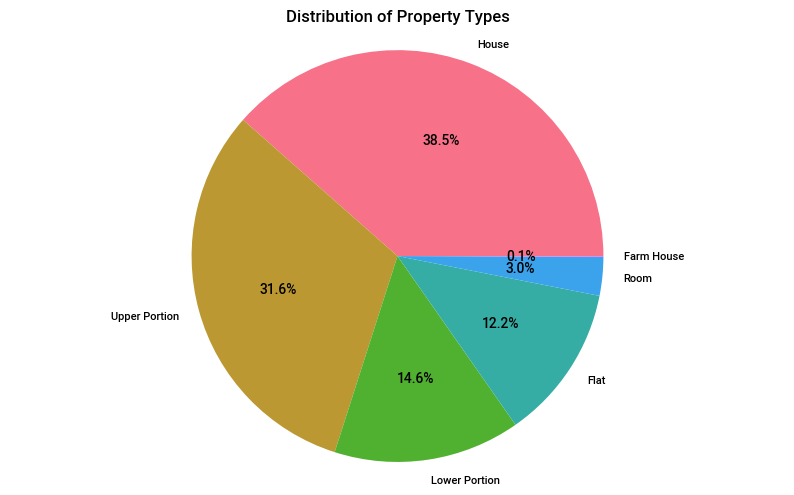

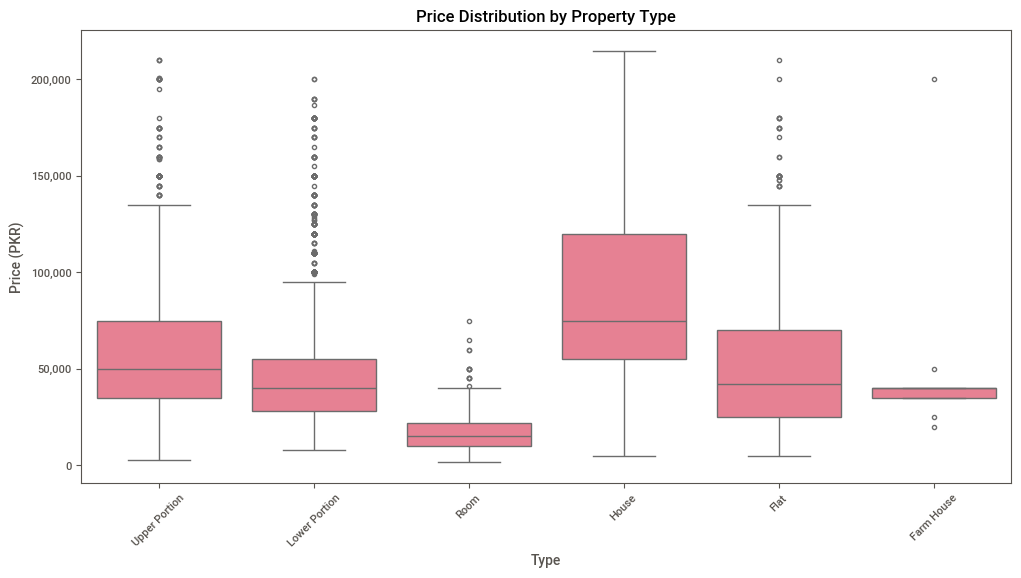


Price Statistics by Property Type:
--------------------------------------------------
               count    mean     std     min     25%     50%      75%      max
Type                                                                          
Farm House        10  52,500  52,506  20,000  35,000  40,000   40,000  200,000
Flat           2,139  49,192  28,734   5,000  25,000  42,000   70,000  210,000
House          6,757  88,798  49,212   5,000  55,000  75,000  120,000  215,000
Lower Portion  2,571  48,432  31,953   8,000  28,000  40,000   55,000  200,000
Room             534  17,852  10,654   1,500  10,000  15,000   22,000   75,000
Upper Portion  5,540  57,156  29,241   2,800  35,000  50,000   75,000  210,000


In [43]:
sns.set_palette("husl")

# Create figure for property type distribution
plt.figure(figsize=(10, 6))
property_counts = df['Type'].value_counts()
plt.pie(property_counts.values, labels=property_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Property Types')
plt.axis('equal')
plt.show()

# Price distribution by property type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Price', data=df)
plt.xticks(rotation=45)
plt.title('Price Distribution by Property Type')
plt.ylabel('Price (PKR)')
plt.gca().yaxis.set_major_formatter(price_formatter)
plt.show()

# Print summary statistics by property type
print("\nPrice Statistics by Property Type:")
print("-" * 50)
stats = df.groupby('Type')['Price'].describe()
# Format numbers with commas, handling both integers and floats
formatted_stats = stats.map(lambda x: format(int(x), ',') if pd.notnull(x) else x)
print(formatted_stats)

# Room Configuration Analysis

The analysis of bedroom and bathroom distributions in Lahore's rental properties reveals clear market preferences. Two side-by-side histograms show that 3-4 bedroom properties dominate the market, while bathroom counts typically cluster around 2-3 per property. This pattern aligns with typical family sizes and local living standards in the region.

The violin plot examining price versus bedroom count uncovers interesting market segmentation. Properties with 2-4 bedrooms show the widest price variations, indicating they cater to diverse market segments. However, as bedroom counts increase beyond 4, the price distribution becomes more concentrated, suggesting a specialized luxury market segment with more standardized pricing.

The statistical breakdown reinforces these observations, with 3 bedrooms and 2 bathrooms emerging as the most common configuration. Bathroom counts generally increase with bedroom numbers, though not linearly, and their impact on rental values becomes more pronounced in premium properties. This relationship between room configurations and pricing provides valuable insights for understanding market preferences and property valuations in Lahore's rental sector.

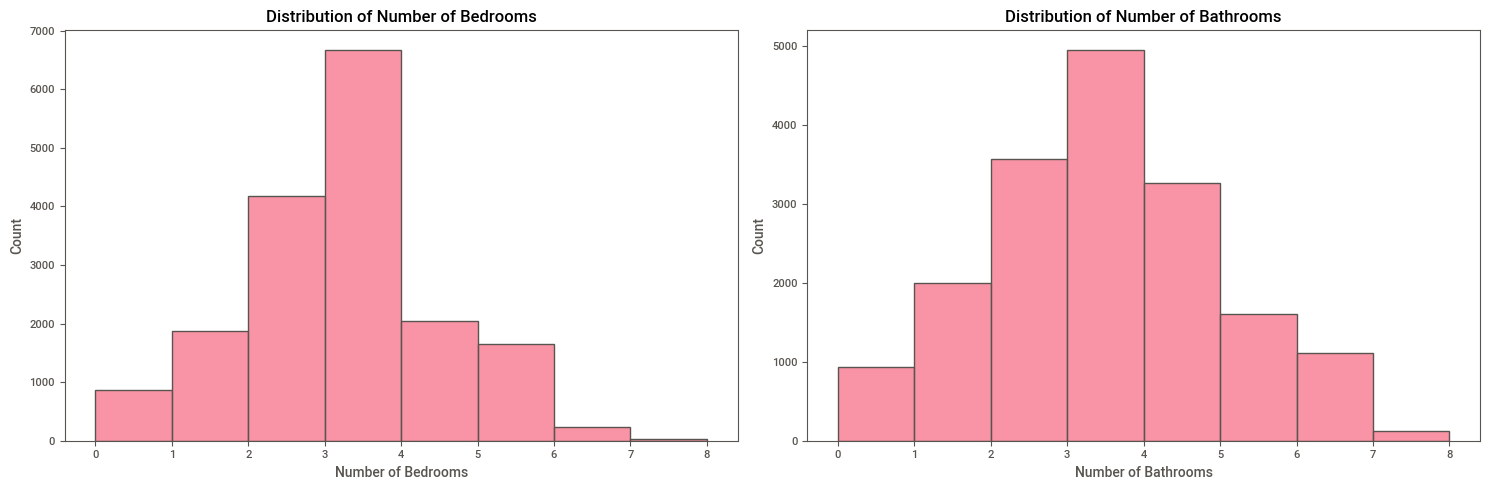

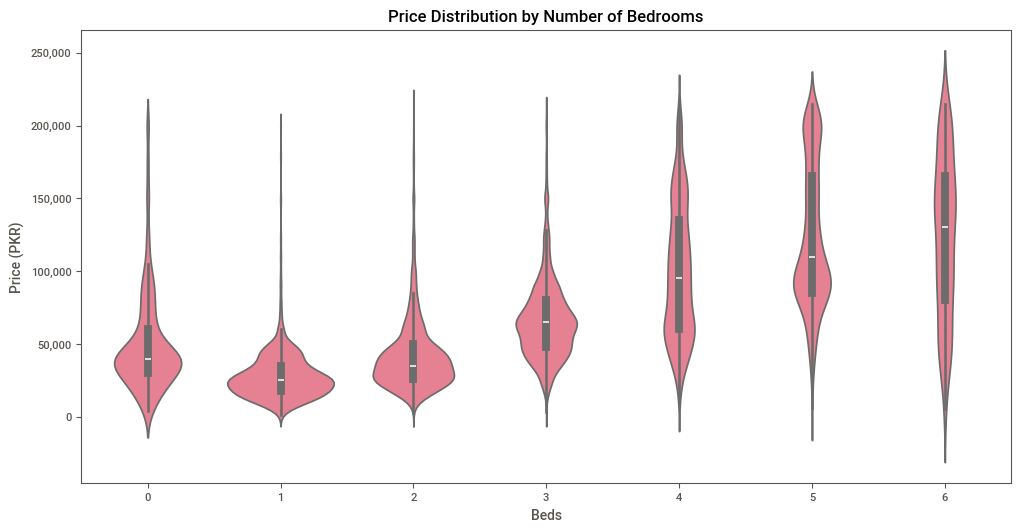


Bedrooms Statistics:
--------------------------------------------------
Beds
0     871
1    1869
2    4170
3    6673
4    2041
5    1659
6     233
7      35
Name: count, dtype: int64

Bathrooms Statistics:
--------------------------------------------------
Baths
0     932
1    2004
2    3566
3    4952
4    3266
5    1606
6    1108
7     117
Name: count, dtype: int64


In [44]:
# Create subplots for beds and baths distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Replace any infinite values with NaN before plotting
df_plot = df.copy()
df_plot.replace([np.inf, -np.inf], np.nan, inplace=True)

# Plot beds distribution
sns.histplot(data=df_plot, x='Beds', bins=range(0, df_plot['Beds'].max()+2, 1), ax=ax1)
ax1.set_title('Distribution of Number of Bedrooms')
ax1.set_xlabel('Number of Bedrooms')

# Plot baths distribution
sns.histplot(data=df_plot, x='Baths', bins=range(0, df_plot['Baths'].max()+2, 1), ax=ax2)
ax2.set_title('Distribution of Number of Bathrooms')
ax2.set_xlabel('Number of Bathrooms')

plt.tight_layout()
plt.show()

# Create violin plot for price vs beds
plt.figure(figsize=(12, 6))
sns.violinplot(x='Beds', y='Price', data=df_plot[df_plot['Beds'] <= 6])
plt.title('Price Distribution by Number of Bedrooms')
plt.ylabel('Price (PKR)')
plt.gca().yaxis.set_major_formatter(price_formatter)
plt.show()

# Print summary of beds and baths
print("\nBedrooms Statistics:")
print("-" * 50)
print(df['Beds'].value_counts().sort_index())

print("\nBathrooms Statistics:")
print("-" * 50)
print(df['Baths'].value_counts().sort_index())

# Property Size Analysis

Area distribution analysis shows patterns typical of urban real estate markets. The histogram reveals a concentration of properties in the medium size range, with fewer properties at the extremes. This aligns with expectations for a developing urban market where land usage optimization is increasingly important.

The relationship between property type and size follows logical patterns. Houses and Farm Houses typically offer larger areas, while Portions and Flats cluster in the medium range. This segmentation reflects both market demand and traditional construction patterns in Lahore.

The statistical analysis provides concrete numbers to these observations. Each property type shows distinct size characteristics, with variations that help explain price differences and market positioning.


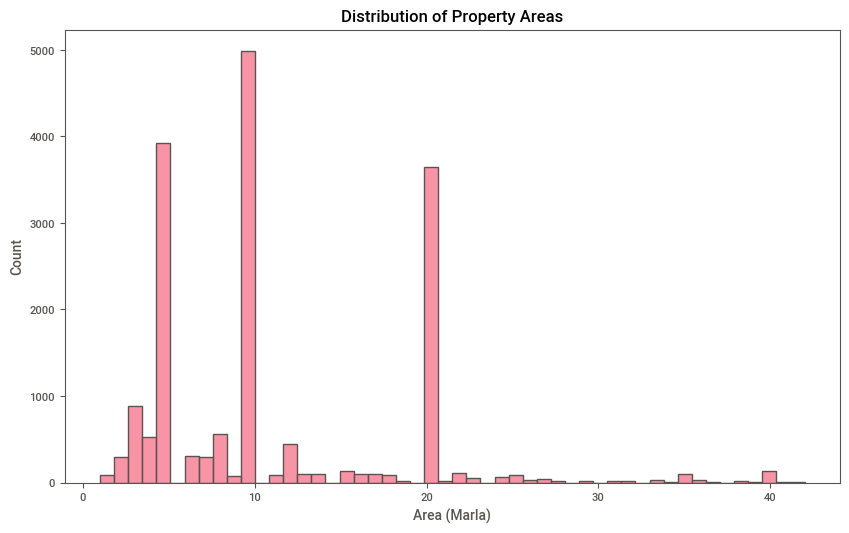

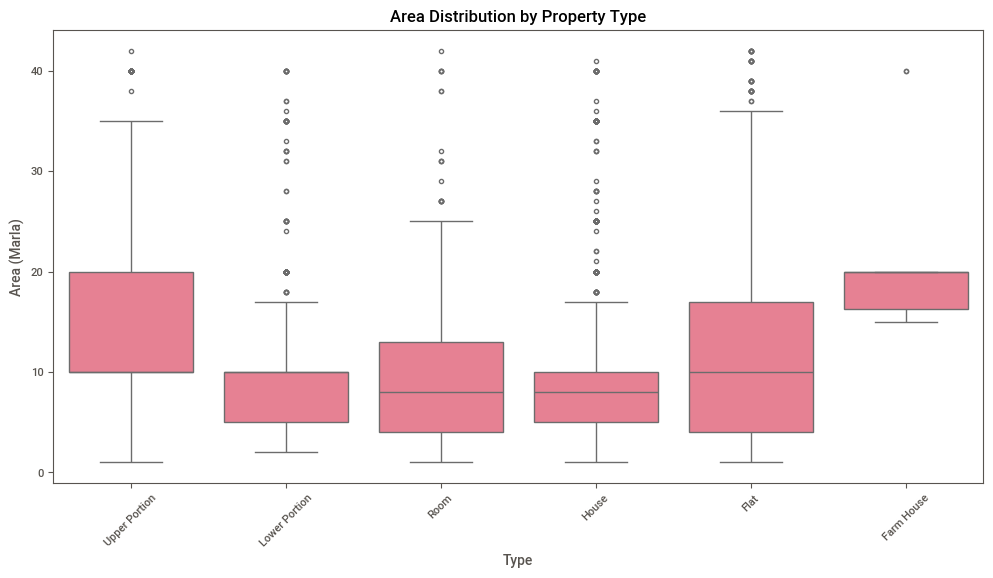


Area Statistics by Property Type:
--------------------------------------------------
                count       mean       std   min    25%   50%   75%   max
Type                                                                     
Farm House       10.0  22.500000  9.501462  15.0  16.25  20.0  20.0  40.0
Flat           2139.0  11.883123  9.343481   1.0   4.00  10.0  17.0  42.0
House          6757.0   9.359183  5.963666   1.0   5.00   8.0  10.0  41.0
Lower Portion  2571.0  10.145858  6.134051   2.0   5.00  10.0  10.0  40.0
Room            534.0   9.803371  7.767053   1.0   4.00   8.0  13.0  42.0
Upper Portion  5540.0  13.905776  7.297421   1.0  10.00  10.0  20.0  42.0


In [45]:
# Create distribution plot for Area
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Area_Marla', bins=50)
plt.title('Distribution of Property Areas')
plt.xlabel('Area (Marla)')
plt.show()

# Create box plot for Area by Property Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Area_Marla', data=df)
plt.xticks(rotation=45)
plt.title('Area Distribution by Property Type')
plt.ylabel('Area (Marla)')
plt.show()

# Calculate and display area statistics
print("\nArea Statistics by Property Type:")
print("-" * 50)
print(df.groupby('Type')['Area_Marla'].describe())

# Price Distribution and Value Analysis

Price distribution analysis reveals multiple market segments within Lahore's rental sector. The main concentration lies in the middle price range, with distinct peaks suggesting standardized price points in the market.

The price per Marla analysis offers insights into value distribution across the city. This metric helps identify areas where properties might be priced differently relative to their size, potentially indicating market inefficiencies or location-based premiums.

The relationship between price and area shows expected positive correlation, though with notable scatter. This variation suggests that while size remains a primary price determinant, other factors such as location, amenities, and property condition significantly influence rental rates.

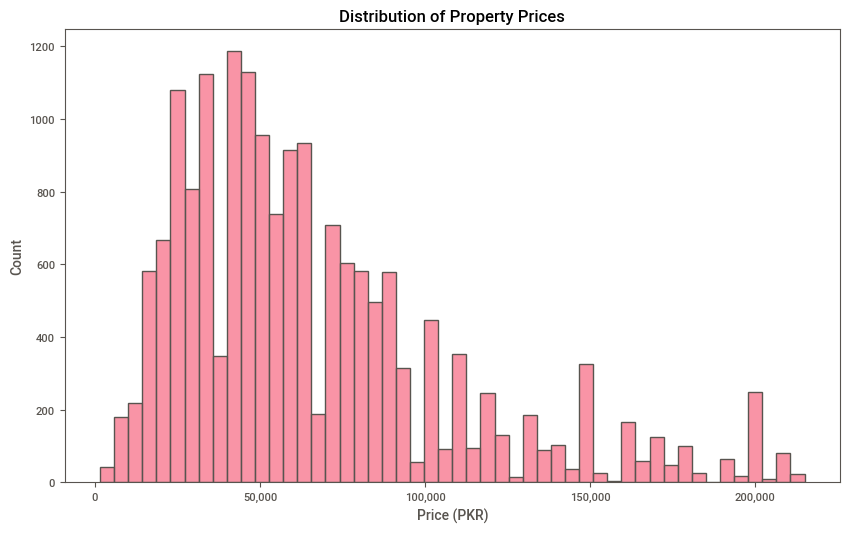

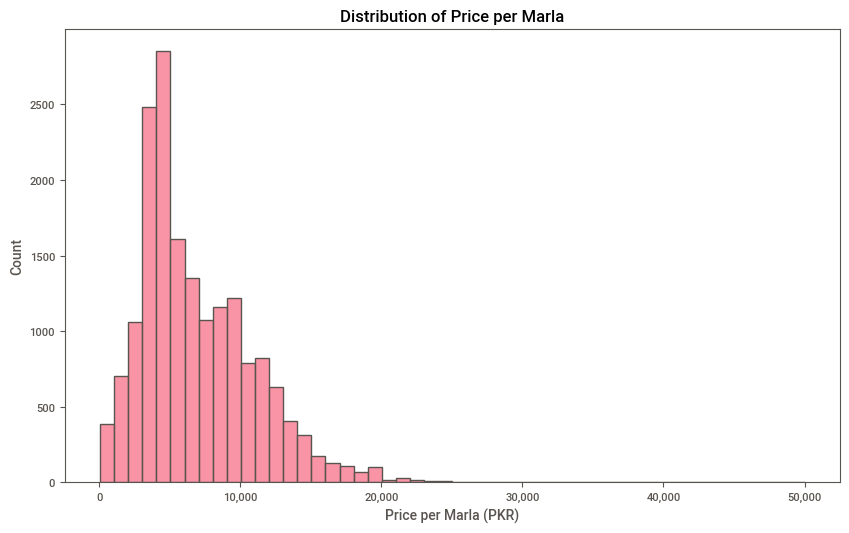

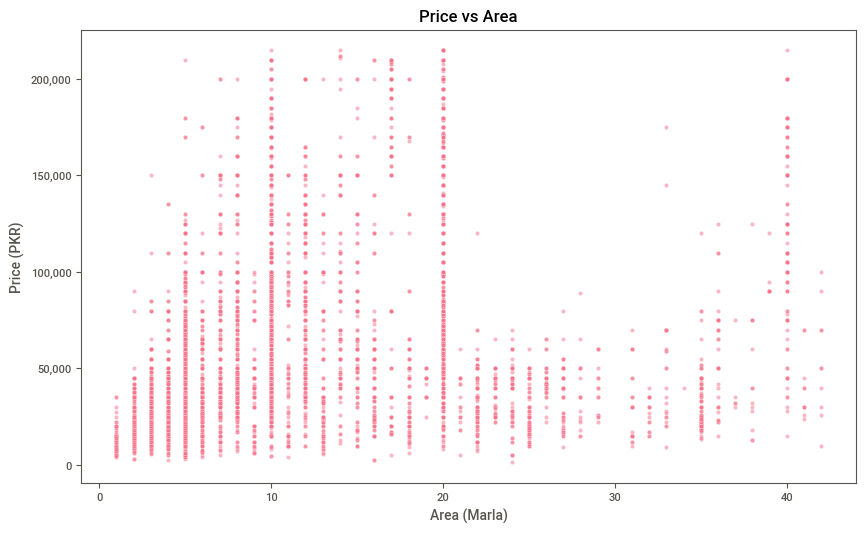


Price Statistics:
--------------------------------------------------
count     17,551
mean      65,891
std       42,804
min        1,500
25%       35,000
50%       55,000
75%       85,000
max      215,000
Name: Price, dtype: object

Price per Marla Statistics:
--------------------------------------------------
count    17,551
mean      7,090
std       4,195
min          62
25%       4,000
50%       6,000
75%      10,000
max      50,000
Name: price_per_marla, dtype: object


In [46]:
# Create distribution plot for prices
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Price', bins=50)
plt.title('Distribution of Property Prices')
plt.xlabel('Price (PKR)')
plt.gca().xaxis.set_major_formatter(price_formatter)
plt.show()

# Create distribution plot for price per marla
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price_per_marla', bins=50)
plt.title('Distribution of Price per Marla')
plt.xlabel('Price per Marla (PKR)')
plt.gca().xaxis.set_major_formatter(price_formatter)
plt.show()

# Create scatter plot of Price vs Area
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Area_Marla', y='Price', alpha=0.5)
plt.title('Price vs Area')
plt.xlabel('Area (Marla)')
plt.ylabel('Price (PKR)')
plt.gca().yaxis.set_major_formatter(price_formatter)
plt.show()
# Print price statistics with formatted numbers
print("\nPrice Statistics:")
print("-" * 50)
price_stats = df['Price'].describe()
formatted_price_stats = price_stats.apply(lambda x: format(int(x), ',') if isinstance(x, (int, float)) else x)
print(formatted_price_stats)

print("\nPrice per Marla Statistics:")
print("-" * 50)
price_marla_stats = df['price_per_marla'].describe()
formatted_price_marla_stats = price_marla_stats.apply(lambda x: format(int(x), ',') if isinstance(x, (int, float)) else x)
print(formatted_price_marla_stats)

# Correlation Analysis

The correlation matrix highlights significant relationships between numerical variables. Price shows strong positive correlations with both area and room counts, though the strength varies among features. These relationships help understand the key drivers of rental prices in the market.

Pair plots provide deeper insights into variable relationships, revealing both linear and non-linear patterns. This comprehensive view helps identify subtle market dynamics that might be missed in simpler analyses.

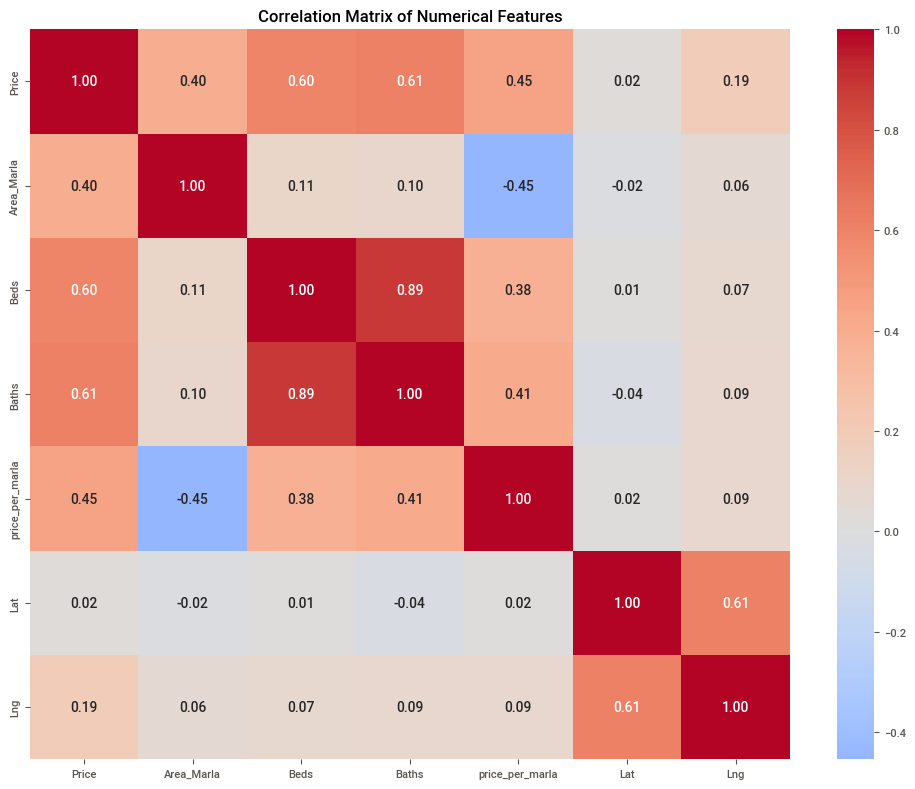

<Figure size 1200x800 with 0 Axes>

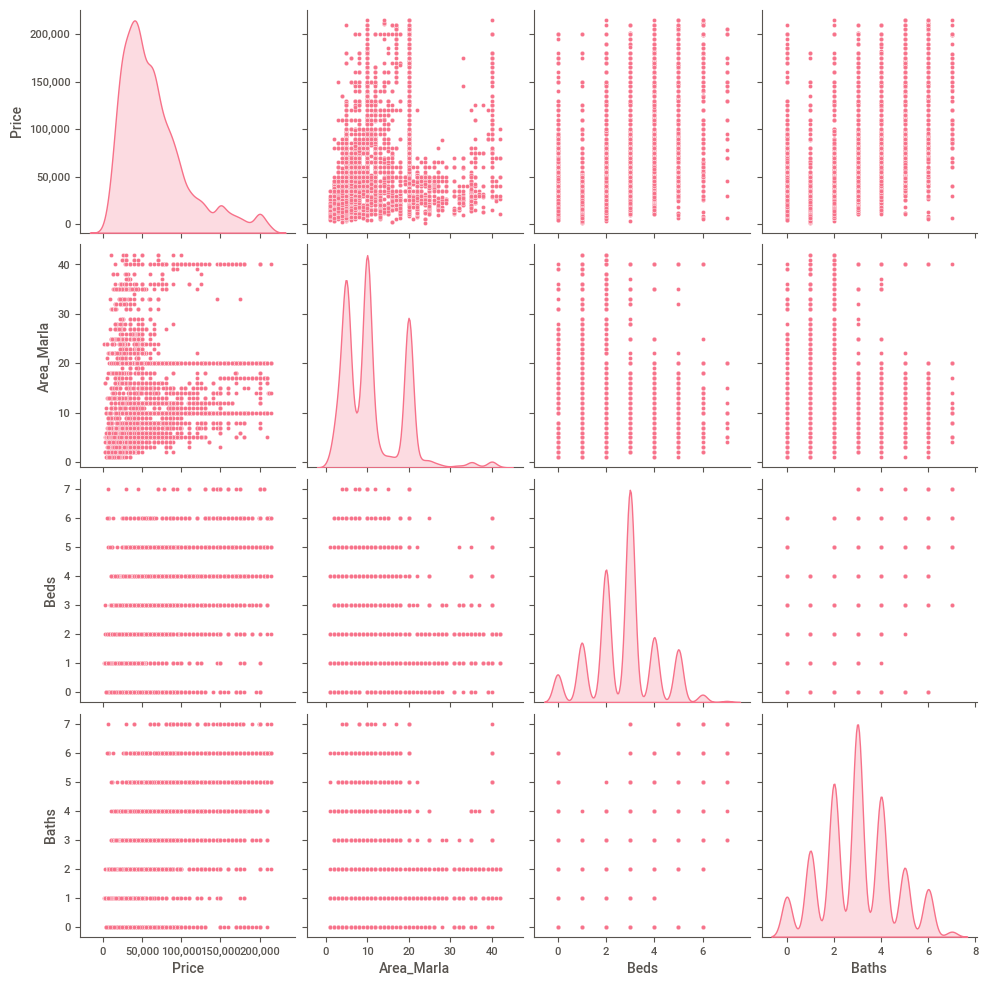


Key Correlations with Price:
--------------------------------------------------
Price              1.000
Baths              0.614
Beds               0.600
price_per_marla    0.451
Area_Marla         0.395
Lng                0.192
Lat                0.023
Name: Price, dtype: float64


In [47]:
# Select numerical columns for correlation
numerical_cols = ['Price', 'Area_Marla', 'Beds', 'Baths', 'price_per_marla', 'Lat', 'Lng']
correlation_matrix = df[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Create pair plot for main features
plt.figure(figsize=(12, 8))
pair_plot = sns.pairplot(df[['Price', 'Area_Marla', 'Beds', 'Baths']], diag_kind='kde')
# Format the price axis in the pair plot
for ax in pair_plot.axes.flat:
    if 'Price' in ax.get_ylabel():
        ax.yaxis.set_major_formatter(price_formatter)
    if 'Price' in ax.get_xlabel():
        ax.xaxis.set_major_formatter(price_formatter)
plt.show()

# Print key correlations with formatted numbers
print("\nKey Correlations with Price:")
print("-" * 50)
price_correlations = correlation_matrix['Price'].sort_values(ascending=False)
print(price_correlations.round(3))

# Geographical Analysis

Spatial analysis reveals clear patterns in Lahore's rental market. The visualization shows price variations across different areas, with notable clustering of higher-priced properties in certain regions. The city center serves as a reference point, helping identify how location influences rental rates.

Distance-based analysis demonstrates price variations relative to central locations. However, the relationship isn't strictly linear, indicating that factors like neighborhood development, accessibility, and local amenities play crucial roles in determining rental values.

These geographical insights help understand both established market patterns and potential opportunities in different areas of Lahore. The analysis particularly helps identify value pockets where prices might not align with location-based expectations.

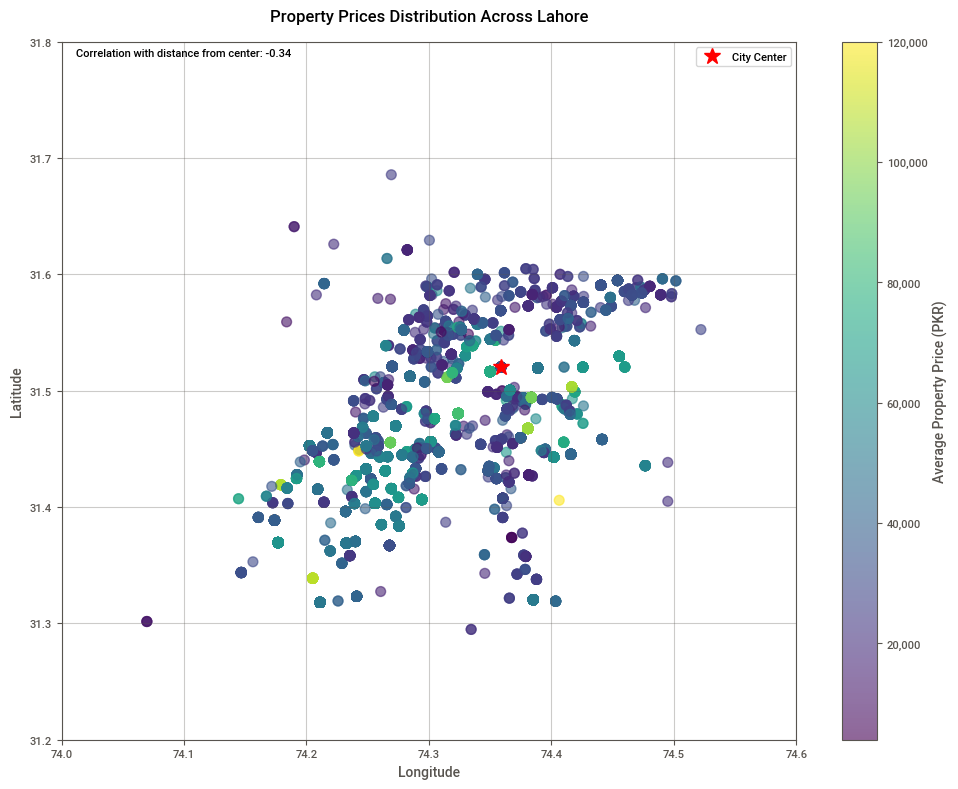


Price Analysis by Distance from City Center:
--------------------------------------------------
                          mean  count
distance_from_center                 
Very Close            86706.21   6756
Close                 45936.56   2021
Far                   52717.35   4397
Very Far              56211.54   4377


In [48]:
# Calculate mean price for each location
location_prices = df.groupby('Location')['Price'].mean().reset_index()

# Merge mean prices back with original dataframe
df_with_mean = df.merge(location_prices, on='Location', suffixes=('', '_mean'))

# Create the scatter plot with smaller size
plt.figure(figsize=(10, 8))

# Create scatter plot with viridis colormap
scatter = plt.scatter(df_with_mean['Lng'], 
                     df_with_mean['Lat'], 
                     c=df_with_mean['Price_mean'],
                     cmap='viridis',
                     alpha=0.6,
                     s=50)

# Customize the colorbar
formatter = ticker.FuncFormatter(lambda x, p: format(int(x), ','))
cbar = plt.colorbar(scatter)
cbar.ax.yaxis.set_major_formatter(formatter)
cbar.set_label('Average Property Price (PKR)', fontsize=10)

# Add labels and title
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Latitude', fontsize=10)
plt.title('Property Prices Distribution Across Lahore', fontsize=12, pad=15)

# Set axis limits
plt.xlim(74.0, 74.6)
plt.ylim(31.2, 31.8)

# Add grid for better reference
plt.grid(True, alpha=0.3)

# Annotate city center
center_lat, center_lng = 31.5204, 74.3587
plt.plot(center_lng, center_lat, 'r*', markersize=12, label='City Center')
plt.legend(fontsize=8)

# Calculate correlation
center_point = np.array([center_lng, center_lat])
distances = []
prices = []

for _, row in df_with_mean.iterrows():
    point = np.array([row['Lng'], row['Lat']])
    distance = np.linalg.norm(point - center_point)
    distances.append(distance)
    prices.append(row['Price_mean'])

correlation = np.corrcoef(distances, prices)[0,1]
plt.text(0.02, 0.98, f'Correlation with distance from center: {correlation:.2f}', 
         transform=plt.gca().transAxes, fontsize=8)

plt.tight_layout()
plt.show()

# Print some additional analysis
print("\nPrice Analysis by Distance from City Center:")
print("-" * 50)
df_with_mean['distance_from_center'] = distances
distance_groups = pd.qcut(df_with_mean['distance_from_center'], q=4, labels=['Very Close', 'Close', 'Far', 'Very Far'])
price_by_distance = df_with_mean.groupby(distance_groups)['Price_mean'].agg(['mean', 'count'])
print(price_by_distance.round(2))